# Esercizi Pandas

---

# Filtering & Sorting

## Importare le librerie necessarie

In [1]:
import pandas as pd

## Importare il dataset Chipotle da questo [indirizzo](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) ed assegnarlo ad una variabile chiamata `chiplo`

In [4]:
# (1 opzione) leggere da file sulla propria macchina il dataset \t
path_dataset_chiplo = 'dataset/chipotle.tsv'
# (2 opzione) leggere un file da un URL
url_dataset_chiplo = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chiplo = pd.read_csv(url_dataset_chiplo, sep='\t')

## Cose da fare:

* Quanti prodotti costano più di $ 10.00?
* Qual è il prezzo di ogni oggetto? (creare un dataframe con solo due colonne `item_name` ed `item_price`)
* Ordinare i valori rispetto il nome dell'oggetto
* Qual è la quantità dell'oggetto ordinato più costoso?
* Quante volte è stata ordinata la Veggie Salad Bowl?
* Quante volte vi è stato qualcuno che ha ordinato più di una Canned Soda?

In [6]:
# passaggio 1: convertire la colonna item_price da object a float (float -> numeri decimali)
def converti(s):
    senza_dollaro = s.replace('$', '') # replace rimpiazza le occorrenze di $ con il carattere vuoto (le cancella)
    valore = float(senza_dollaro)
    return valore

chiplo['item_price'] = chiplo.item_price.apply(converti)

In [37]:
# Quanti prodotti costano più di $ 10.00?
numero_prodotti_unici = chiplo[chiplo.item_price > 10.00].item_name.nunique()
prodotti_unici = chiplo[chiplo.item_price > 10.00].item_name.unique()

print('Abbiamo', numero_prodotti_unici, 'prodotti unici che costano più di $ 10')
print('Questi prodotti sono:', prodotti_unici)

Abbiamo 31 prodotti unici che costano più di $ 10
Questi prodotti sono: ['Chicken Bowl' 'Steak Burrito' 'Chicken Burrito' 'Barbacoa Bowl'
 'Veggie Burrito' 'Veggie Bowl' 'Chicken Soft Tacos' 'Steak Bowl'
 'Carnitas Burrito' 'Carnitas Bowl' 'Barbacoa Burrito'
 'Chicken Salad Bowl' 'Barbacoa Crispy Tacos' 'Veggie Salad Bowl'
 'Chicken Crispy Tacos' 'Chicken Salad' 'Steak Salad Bowl' 'Bowl'
 'Veggie Soft Tacos' 'Barbacoa Soft Tacos' 'Carnitas Crispy Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl'
 'Chips and Fresh Tomato Salsa' 'Steak Soft Tacos' 'Carnitas Soft Tacos'
 'Steak Crispy Tacos' 'Chips and Guacamole' '6 Pack Soft Drink'
 'Bottled Water' 'Side of Chips']


In [45]:
# Qual è il prezzo di ogni oggetto? (creare un dataframe con solo due colonne item_name ed item_price)
chiplo_2column = chiplo[['item_name', 'item_price']].drop_duplicates()
chiplo_2column.head()

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98


In [47]:
# Ordinare i valori rispetto il nome dell'oggetto
chiplo_2column.sort_values(by='item_price', ascending=False) #ascending=True -> ordina in modo crescente

,item_name,item_price
3598,Chips and Fresh Tomato Salsa,44.25
3480,Carnitas Bowl,35.25
1254,Chicken Burrito,35.00
3601,Veggie Burrito,33.75
409,Chicken Bowl,32.94
...,...,...
6,Side of Chips,1.69
329,Bottled Water,1.50
263,Canned Soft Drink,1.25
28,Canned Soda,1.09


In [52]:
# Qual è la quantità dell'oggetto ordinato più costoso?
chiplo_3column = chiplo[['quantity', 'item_name', 'item_price']].drop_duplicates()
chiplo_3column.sort_values(by='item_price', ascending=False).head(1)

,quantity,item_name,item_price
3598,15,Chips and Fresh Tomato Salsa,44.25


In [58]:
# Quante volte è stata ordinata la Veggie Salad Bowl?
solo_vsb = chiplo[chiplo.item_name == 'Veggie Salad Bowl']
len(solo_vsb)

18

In [68]:
# Quante volte vi è stato qualcuno che ha ordinato più di una Canned Soda?
# & = and, | = or
len(chiplo[(chiplo.item_name == 'Canned Soda') & (chiplo.quantity > 1)])

20

## Importare il dataset Euro12 da questo [indirizzo](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv) ed assegnarlo ad una variabile chiamata `euro12`

In [2]:
path_file_euro12 = 'dataset/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(path_file_euro12)

In [21]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,0.519,0.160,32,0,0,0,...,13,0.813,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,0.419,0.129,39,0,0,0,...,9,0.601,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,0.500,0.200,27,1,0,0,...,10,0.667,25,38,8,4,0,7,7,15
3,England,5,11,18,0.500,0.172,40,0,0,0,...,22,0.881,43,45,6,5,0,11,11,16
4,France,3,22,24,0.379,0.065,65,1,0,0,...,6,0.546,36,51,5,6,0,11,11,19


In [20]:
def convert_percentuale(s):
    if type(s) == str:
        senza_percent = s.replace('%', '')
        return float(senza_percent) / 100.0
    return s


euro12['Shooting Accuracy'] = euro12['Shooting Accuracy'].apply(convert_percentuale)
euro12['% Goals-to-shots'] = euro12['% Goals-to-shots'].apply(convert_percentuale)
euro12['Passing Accuracy'] = euro12['Passing Accuracy'].apply(convert_percentuale)
euro12['Saves-to-shots ratio'] = euro12['Saves-to-shots ratio'].apply(convert_percentuale)

## Cose da fare:

* Selezionare solo la colonna Goal
* Quante squadre hanno partecipato alla competizione?
* Qual è il numero di colonne del dataframe?
* Selezionare solo le colonne Team, Yellow Cards e Red Cards ed assegnarle ad un dataframe la cui variabile assegnata è `discipline`
* Ordinare le squadre prima per Red Cards, poi per Yellow Cards
* Calcolare la media dei Yellow Cards per squadra
* Selezionare i team che hanno fatto più di 6 goal
* Selezionare i team che iniziano con la lettera G
* Selezionare le prime 7 colonne
* Selezionare tutte le colonne eccetto le ultime 3
* Visualizzare solo la Shooting Accuracy di England, Italy e Russia

In [64]:
# euro12.Goals
# print('Hanno partecipato', len(euro12), 'squadre')
# print('Il dataframe ha', len(euro12.columns), 'colonne')

#discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
# discipline.sort_values(by='Yellow Cards')

# round(discipline['Yellow Cards'].mean())

# euro12[euro12['Goals'] > 6]

# euro12[euro12['Team'].str.startswith('G')]

# euro12.iloc[:, 0:7]
# euro12.iloc[:, :-3]

#euro12[(euro12['Team'] == 'England') | (euro12['Team'] == 'Italy') | (euro12['Team'] == 'Russia')]
# team_da_controllare = ['England', 'Italy', 'Russia']
# euro12[euro12['Team'].isin(team_da_controllare)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
3,England,5,11,18,0.500,0.172,40,0,0,0,...,22,0.881,43,45,6,5,0,11,11,16
7,Italy,6,34,45,0.430,0.075,110,2,0,0,...,20,0.741,101,89,16,16,0,18,18,19
12,Russia,5,9,31,0.225,0.125,59,2,0,0,...,10,0.770,34,43,4,6,0,7,7,16


---

# Raggruppamenti per proprietà

## Importare il dataset Alcohol Consumption da questo [indirizzo](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv) ed assegnarlo ad una variabile chiamata `drinks`

## Cose da fare:
* Quale continente beve mediamente più birra?
* Per ogni continente, visualizzare le statisiche per il consumo di vino
* Visualizzare il consumo di alcol (media) per continente per ogni colonna
* Visualizzare il consumo di alcol (mediana) per continente per ogni colonna
* Visualizzare media, min e max per continente per il consumo di spirito

---

# Modificare un dataframe

## Importare il dataset Student Alcohol Consumption da questo [indirizzo](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv) ed assegnarlo ad una variabile chiamata `student_drinks`

## Cose da fare:

* Modificare il dataframe in modo da selezionare solo le colonne da `school` a `guardian`
* Modificare i valori testuali nelle colonne `Mjob` e `Fjob` in modo da avere la lettera iniziale maiuscola
* Creare una nuova colonna `legal_drinker` che contenga il valore `True` se il record corrente riguarda uno studente che può bere legalmente (ovvero la sua età è > 17 anni)

---

# Visualizzazione

## Importazione delle librerie necessarie

In [24]:
# questo lo usiamo per mostrare i grafici direttamente nel notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## Cose da fare con il dataframe `chiplo`:

* Visualizzazione dei primi 10 record
* Istogramma dei top 5 oggetti acquistati
* Scatterplot del numero di oggetti ordinati per prezzo dell'ordine (l'intervallo del prezzo dell'ordine dovrebbe stare sull'ascissa, mentre l'ordinata dovrebbe indicare il numero di oggetti ordinati con quel prezzo)


In [45]:
chiplo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


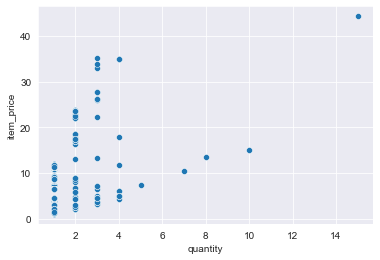

In [48]:
sns.scatterplot(data=chiplo, x='quantity', y='item_price');

In [20]:
item_acquistati = chiplo.groupby('item_name').count()['order_id'].reset_index()
top_5_item = item_acquistati.sort_values(by='order_id', ascending=False).head()

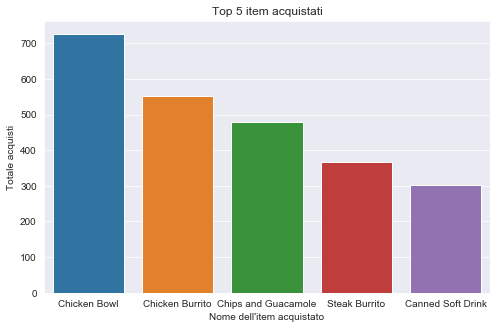

In [35]:
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(data=top_5_item, x='item_name', y='order_id', ax=ax);

ax.set_xlabel("Nome dell'item acquistato");
ax.set_ylabel("Totale acquisti");
ax.set_title('Top 5 item acquistati');

fig.savefig("top_5_item.png", dpi=100)

## Importare il dataset Online Retail da questo [indirizzo](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv) ed assegnarlo ad una variabile chiamata `online_rt`

## Cose da fare con il dataframe `online_rt`:

* Istogramma delle prime 10 country con il maggior valore di Quantity
* Istogramma dei primi 10 oggetti con il maggior valore di UnitPrice